## API Authentication
The package **`tweepy`** is great at handling all the Twitter API OAuth Authentication details for you. All you need to do is pass it your authentication credentials. In this interactive exercise, we have created some mock authentication credentials (if you wanted to replicate this at home, you would need to create a Twitter App as Hugo detailed in the video). Your task is to pass these credentials to tweepy's OAuth handler.

In [1]:
# Import package
import tweepy

# Store OAuth authentication credentials in relevant variables
# These are from the DataCamp Exercise, put mine in when approved
access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"
consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)


## Streaming tweets
Now that you have set up your authentication credentials, it is time to stream some tweets! We have already defined the tweet stream listener class, **`MyStreamListener`**, just as Hugo did in the introductory video. You can find the code for the tweet stream listener class here.

Your task is to create the **`Stream`** object and to filter tweets according to particular keywords.

In [5]:
# Define stream listener class
class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("D:/Springboard_DataCamp/data/Importing_Data_in_Python_Part2/tweets.txt", "w")
 
    def on_status(self, status):
        tweet = status._json
        self.file.write(json.dumps(tweet) + '\n')
        tweet_list.append(status)
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False
        self.file.close()

In [6]:
# Initialize Stream listener
l = MyStreamListener()

# Create your Stream object with authentication
stream = tweepy.Stream(auth, l)


# Filter Twitter Streams to capture data by the keywords:
stream.filter(track=['clinton', 'trump', 'sanders', 'cruz'])

## Load and explore your Twitter data
Now that you've got your Twitter data sitting locally in a text file, it's time to explore it! This is what you'll do in the next few interactive exercises. In this exercise, you'll read the Twitter data into a list: **`tweets_data`**.

In [8]:
# Import package
import json

# String of path to file: tweets_data_path
tweets_data_path = 'D:/Springboard_DataCamp/data/Importing_Data_in_Python_Part2/tweets.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())

IndexError: list index out of range

In [9]:
# this is the output of the DataCamp exercise
'''
script.py> output:
    dict_keys(['possibly_sensitive', 'in_reply_to_screen_name', 'truncated', 
    'extended_entities', 'in_reply_to_status_id_str', 'created_at', 'timestamp_ms', 
    'retweet_count', 'filter_level', 'lang', 'place', 'coordinates', 'in_reply_to_user_id', 
    'user', 'id_str', 'is_quote_status', 'entities', 'geo', 'retweeted', 'favorited', 
    'retweeted_status', 'source', 'contributors', 'in_reply_to_user_id_str', 'in_reply_to_status_id', 
    'id', 'text', 'favorite_count'])
'''

"\nscript.py> output:\n    dict_keys(['possibly_sensitive', 'in_reply_to_screen_name', 'truncated', \n    'extended_entities', 'in_reply_to_status_id_str', 'created_at', 'timestamp_ms', \n    'retweet_count', 'filter_level', 'lang', 'place', 'coordinates', 'in_reply_to_user_id', \n    'user', 'id_str', 'is_quote_status', 'entities', 'geo', 'retweeted', 'favorited', \n    'retweeted_status', 'source', 'contributors', 'in_reply_to_user_id_str', 'in_reply_to_status_id', \n    'id', 'text', 'favorite_count'])\n"

## Twitter data to DataFrame
Now you have the Twitter data in a list of dictionaries, **`tweets_data`**, where each dictionary corresponds to a single tweet. Next, you're going to extract the text and language of each tweet. The text in a tweet, **`t1`**, is stored as the value **`t1['text']`**; similarly, the language is stored in **`t1['lang']`**. Your task is to build a DataFrame in which each row is a tweet and the columns are **`'text'`** and **`'lang'`**.

In [10]:
# Import package
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

# Print head of DataFrame
print(df.head())

Empty DataFrame
Columns: [text, lang]
Index: []


## A little bit of Twitter text analysis
Now that you have your DataFrame of tweets set up, you're going to do a bit of text analysis to count how many tweets contain the words 'clinton', 'trump', 'sanders' and 'cruz'. In the pre-exercise code, we have defined the following function **`word_in_text()`**, which will tell you whether the first argument (a word) occurs within the 2nd argument (a tweet).

```python
import re

def word_in_text(word, text):
    word = word.lower()
    text = tweet.lower()
    match = re.search(word, text)

    if match:
        return True
    return False
```
You're going to iterate over the rows of the DataFrame and calculate how many tweets contain each of our keywords! The list of objects for each candidate has been initialized to 0.

In [11]:
import re

def word_in_text(word, text):
    word = word.lower()
    text = tweet.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

In [12]:
# Initialize list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])

## Plotting your Twitter data
Now that you have the number of tweets that each candidate was mentioned in, you can plot a bar chart of this data. You'll use the statistical data visualization library **`seaborn`**, which you may not have seen before, but we'll guide you through. You'll first import **`seaborn`** as **`sns`**. You'll then construct a barplot of the data using **`sns.barplot`**, passing it two arguments:

1. a list of labels and
2. a list containing the variables you wish to plot (clinton, trump and so on.)

Hopefully, you'll see that Trump was unreasonably represented! We have already run the previous exercise solutions in your environment.

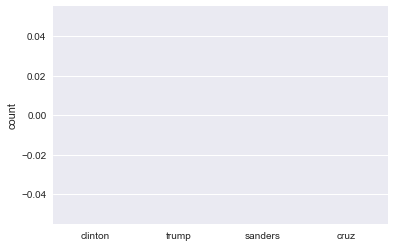

In [15]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton', 'trump', 'sanders', 'cruz']

# Plot histogram
ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()